In [1]:
import os

# Input directory containing the year-named files
input_directory = "/Users/praharshita/Desktop/Capstone/cleaned_files_by_year"

# Output directory for the merged file
output_directory = "/Users/praharshita/Desktop/Capstone/word-embedding-files"

def merge_files(start_year,end_year):

    # Output filename for the merged file
    output_filename = f'{start_year}-{end_year}.txt'

    # Initialize an empty merged content
    merged_content = ''

    # Iterate through the range of years specified
    for year in range(start_year, end_year + 1):
        file_name = f'{year}.txt'
        file_path = os.path.join(input_directory, file_name)

        # Check if the file exists
        if os.path.exists(file_path):
            with open(file_path, 'r', encoding='utf-8') as file:
                file_content = file.read()
                merged_content += f'\nYear {year}:\n\n{file_content}\n'

    # Create the output directory if it doesn't exist
    os.makedirs(output_directory, exist_ok=True)

    # Write the merged content to the output file in the output directory
    output_file_path = os.path.join(output_directory, output_filename)
    with open(output_file_path, 'w', encoding='utf-8') as output_file:
        output_file.write(merged_content)

    print(f'Merged content saved to {output_file_path}')


In [3]:
merge_files(1918,1927)

Merged content saved to /Users/praharshita/Desktop/Capstone/word-embedding-files/1918-1927.txt


In [4]:
merge_files(1928,1938)

Merged content saved to /Users/praharshita/Desktop/Capstone/word-embedding-files/1928-1938.txt


In [5]:
merge_files(1800,1899)

Merged content saved to /Users/praharshita/Desktop/Capstone/word-embedding-files/1800-1899.txt


In [6]:
merge_files(2000,2006)

Merged content saved to /Users/praharshita/Desktop/Capstone/word-embedding-files/2000-2006.txt


In [2]:
merge_files(1900,1999)

Merged content saved to /Users/praharshita/Desktop/Capstone/word-embedding-files/1900-1999.txt


In [8]:
pip install word2vec

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 42.3/42.3 kB 211.2 kB/s eta 0:00:00a 0:00:01
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
  Created wheel for word2vec: filename=word2vec-0.11.1-py2.py3-none-any.whl size=110144 sha256=cc9195c6d22994814efffebb00239f9bbec9b2ff53fd694b9b9d7f78a9f21b69
  Stored in directory: /Users/praharshita/Library/Caches/pip/wheels/d7/3e/81/4f4daaa6d86f5b9301c16cb1051baa2cbf8f0a309063862b2b
Successfully built word2vec

[notice] A new release of pip is available: 23.1 -> 23.2.1
[notice] To update, run: pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [3]:
from gensim.models import Word2Vec
from nltk.tokenize import sent_tokenize, word_tokenize
import logging

def train_model(path):
    logging.basicConfig(format="%(asctime)s - %(levelname)s - %(message)s", level=logging.INFO)
    # Read the text from the file
    with open(path, 'r', encoding='utf-8') as file:
        text = file.read()

    # Tokenize the text into sentences
    sentences = sent_tokenize(text)

    # Tokenize each sentence into words
    tokenized_sentences = [word_tokenize(sentence) for sentence in sentences]
    logging.basicConfig(format="%(levelname)s - %(message)s", level=logging.DEBUG)

    # Create and train the Word2Vec model
    model = Word2Vec(tokenized_sentences, vector_size=100, window=5, min_count=1, sg=0 , negative=5)

    # You can now use the 'model' for various word embedding tasks
    logging.info("Training Word2Vec model...")
    model.train(tokenized_sentences, total_examples=len(tokenized_sentences), epochs=10)
    logging.info("Word2Vec training complete.")
    
    return model

In [4]:
import matplotlib.pyplot as plt
from wordcloud import WordCloud

# Define a list of stopwords to exclude from the word cloud
stopwords = ['woman', 'man', 'men', 'person', 'women' , 'boy' , 'girl' , 'people' , 'person']

def generate_wordcloud(model, word):
    similar_words = model.wv.most_similar(word, topn=50)

    # Create a word cloud based on the similarity scores, excluding stopwords
    wordcloud_dict = {word: score for word, score in similar_words if word not in stopwords}

    # Initialize the WordCloud object
    wordcloud = WordCloud(width=800, height=400, background_color='white')

    # Generate the word cloud image from the filtered dictionary
    wordcloud.generate_from_frequencies(wordcloud_dict)

    # Display the word cloud using matplotlib
    plt.figure(figsize=(10, 6))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis("off")
    plt.title(f"Word Cloud of Similar Words to '{word}' ")
    plt.show()

# Example usage:
#generate_wordcloud(model, 'woman')


INFO - collecting all words and their counts
INFO - PROGRESS: at sentence #0, processed 0 words, keeping 0 word types
INFO - collected 85326 word types from a corpus of 11385434 raw words and 5175 sentences
INFO - Creating a fresh vocabulary
DEBUG - starting a new internal lifecycle event log for Word2Vec
INFO - Word2Vec lifecycle event {'msg': 'effective_min_count=1 retains 85326 unique words (100.00% of original 85326, drops 0)', 'datetime': '2023-09-24T19:27:52.107955', 'gensim': '4.3.1', 'python': '3.9.12 (main, Apr  5 2022, 01:53:17) \n[Clang 12.0.0 ]', 'platform': 'macOS-10.16-x86_64-i386-64bit', 'event': 'prepare_vocab'}
INFO - Word2Vec lifecycle event {'msg': 'effective_min_count=1 leaves 11385434 word corpus (100.00% of original 11385434, drops 0)', 'datetime': '2023-09-24T19:27:52.108869', 'gensim': '4.3.1', 'python': '3.9.12 (main, Apr  5 2022, 01:53:17) \n[Clang 12.0.0 ]', 'platform': 'macOS-10.16-x86_64-i386-64bit', 'event': 'prepare_vocab'}
INFO - deleting the raw counts 

INFO - EPOCH 0 - PROGRESS: at 97.78% examples, 1823874 words/s, in_qsize 5, out_qsize 0
DEBUG - job loop exiting, total 1204 jobs
DEBUG - worker exiting, processed 398 jobs
DEBUG - worker thread finished; awaiting finish of 2 more threads
DEBUG - worker exiting, processed 401 jobs
DEBUG - worker thread finished; awaiting finish of 1 more threads
DEBUG - worker thread finished; awaiting finish of 0 more threads
DEBUG - worker exiting, processed 405 jobs
INFO - EPOCH 0: training on 11385434 raw words (9309758 effective words) took 5.1s, 1823581 effective words/s
INFO - EPOCH 1 - PROGRESS: at 20.31% examples, 1817041 words/s, in_qsize 5, out_qsize 0
INFO - EPOCH 1 - PROGRESS: at 43.94% examples, 1831123 words/s, in_qsize 5, out_qsize 0
INFO - EPOCH 1 - PROGRESS: at 59.07% examples, 1835136 words/s, in_qsize 6, out_qsize 1
INFO - EPOCH 1 - PROGRESS: at 77.58% examples, 1830972 words/s, in_qsize 5, out_qsize 0
INFO - EPOCH 1 - PROGRESS: at 97.49% examples, 1818403 words/s, in_qsize 5, out_q

INFO - EPOCH 9 - PROGRESS: at 97.39% examples, 1817928 words/s, in_qsize 5, out_qsize 0
DEBUG - job loop exiting, total 1204 jobs
DEBUG - worker exiting, processed 398 jobs
DEBUG - worker thread finished; awaiting finish of 2 more threads
DEBUG - worker exiting, processed 399 jobs
DEBUG - worker thread finished; awaiting finish of 1 more threads
DEBUG - worker exiting, processed 407 jobs
DEBUG - worker thread finished; awaiting finish of 0 more threads
INFO - EPOCH 9: training on 11385434 raw words (9309174 effective words) took 5.1s, 1816399 effective words/s
INFO - Word2Vec lifecycle event {'msg': 'training on 113854340 raw words (93096412 effective words) took 51.1s, 1820264 effective words/s', 'datetime': '2023-09-24T19:29:09.861187', 'gensim': '4.3.1', 'python': '3.9.12 (main, Apr  5 2022, 01:53:17) \n[Clang 12.0.0 ]', 'platform': 'macOS-10.16-x86_64-i386-64bit', 'event': 'train'}
INFO - Word2Vec training complete.


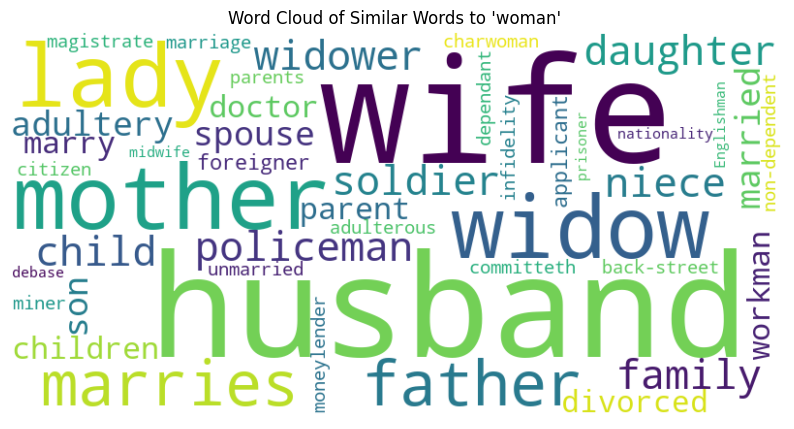

In [32]:
path='/Users/praharshita/Desktop/Capstone/word-embedding-files/1918-1927.txt'
model_1918_1927=train_model(path)

generate_wordcloud(model_1918_1927,'woman')

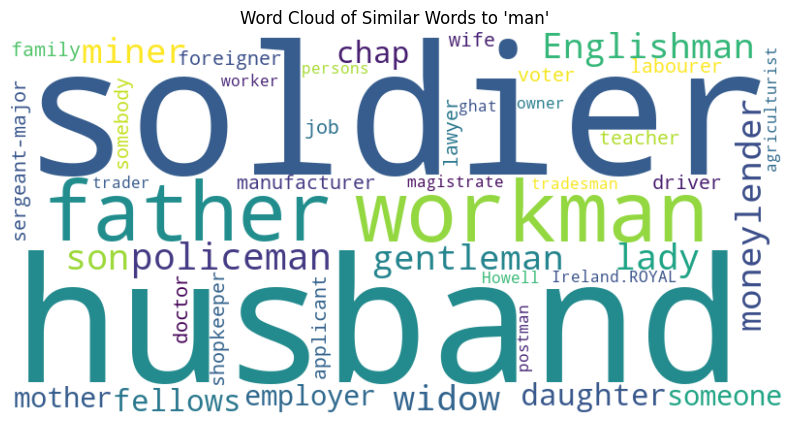

In [33]:
generate_wordcloud(model_1918_1927,'man')

In [20]:
path='/Users/praharshita/Desktop/Capstone/word-embedding-files/1928-1938.txt'
model_1928_1938=train_model(path)

INFO - collecting all words and their counts
INFO - PROGRESS: at sentence #0, processed 0 words, keeping 0 word types
INFO - collected 91131 word types from a corpus of 12624080 raw words and 4397 sentences
INFO - Creating a fresh vocabulary
DEBUG - starting a new internal lifecycle event log for Word2Vec
INFO - Word2Vec lifecycle event {'msg': 'effective_min_count=1 retains 91131 unique words (100.00% of original 91131, drops 0)', 'datetime': '2023-09-22T22:03:05.330872', 'gensim': '4.3.1', 'python': '3.9.12 (main, Apr  5 2022, 01:53:17) \n[Clang 12.0.0 ]', 'platform': 'macOS-10.16-x86_64-i386-64bit', 'event': 'prepare_vocab'}
INFO - Word2Vec lifecycle event {'msg': 'effective_min_count=1 leaves 12624080 word corpus (100.00% of original 12624080, drops 0)', 'datetime': '2023-09-22T22:03:05.331621', 'gensim': '4.3.1', 'python': '3.9.12 (main, Apr  5 2022, 01:53:17) \n[Clang 12.0.0 ]', 'platform': 'macOS-10.16-x86_64-i386-64bit', 'event': 'prepare_vocab'}
INFO - deleting the raw counts 

INFO - EPOCH 0 - PROGRESS: at 90.36% examples, 1912959 words/s, in_qsize 5, out_qsize 0
DEBUG - job loop exiting, total 1420 jobs
DEBUG - worker exiting, processed 481 jobs
DEBUG - worker thread finished; awaiting finish of 2 more threads
DEBUG - worker exiting, processed 476 jobs
DEBUG - worker thread finished; awaiting finish of 1 more threads
DEBUG - worker exiting, processed 463 jobs
DEBUG - worker thread finished; awaiting finish of 0 more threads
INFO - EPOCH 0: training on 12624080 raw words (10589394 effective words) took 5.5s, 1916438 effective words/s
INFO - EPOCH 1 - PROGRESS: at 18.01% examples, 1909018 words/s, in_qsize 5, out_qsize 0
INFO - EPOCH 1 - PROGRESS: at 39.35% examples, 1920346 words/s, in_qsize 5, out_qsize 0
INFO - EPOCH 1 - PROGRESS: at 58.81% examples, 1923755 words/s, in_qsize 5, out_qsize 0
INFO - EPOCH 1 - PROGRESS: at 73.89% examples, 1925555 words/s, in_qsize 6, out_qsize 0
INFO - EPOCH 1 - PROGRESS: at 90.52% examples, 1920057 words/s, in_qsize 5, out_

INFO - EPOCH 9 - PROGRESS: at 90.52% examples, 1918944 words/s, in_qsize 5, out_qsize 0
DEBUG - job loop exiting, total 1420 jobs
DEBUG - worker exiting, processed 472 jobs
DEBUG - worker thread finished; awaiting finish of 2 more threads
DEBUG - worker exiting, processed 467 jobs
DEBUG - worker thread finished; awaiting finish of 1 more threads
DEBUG - worker exiting, processed 481 jobs
DEBUG - worker thread finished; awaiting finish of 0 more threads
INFO - EPOCH 9: training on 12624080 raw words (10589327 effective words) took 5.5s, 1922015 effective words/s
INFO - Word2Vec lifecycle event {'msg': 'training on 126240800 raw words (105893919 effective words) took 55.3s, 1914663 effective words/s', 'datetime': '2023-09-22T22:04:29.313148', 'gensim': '4.3.1', 'python': '3.9.12 (main, Apr  5 2022, 01:53:17) \n[Clang 12.0.0 ]', 'platform': 'macOS-10.16-x86_64-i386-64bit', 'event': 'train'}
INFO - Word2Vec training complete.


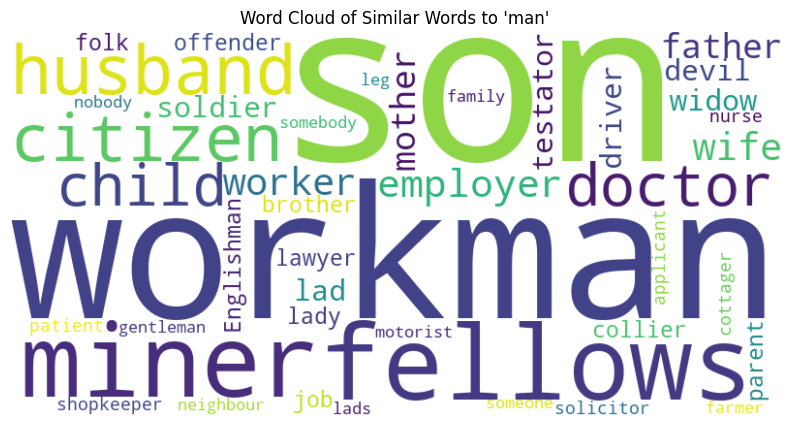

In [25]:
generate_wordcloud(model_1928_1938,'man')

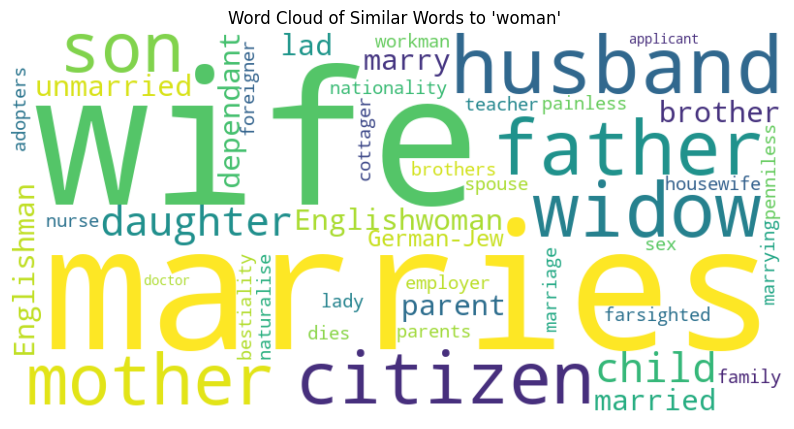

In [26]:
generate_wordcloud(model_1928_1938,'woman')

In [27]:
path='/Users/praharshita/Desktop/Capstone/word-embedding-files/1800-1899.txt'
model_1800_1899=train_model(path)

INFO - collecting all words and their counts
INFO - PROGRESS: at sentence #0, processed 0 words, keeping 0 word types
INFO - PROGRESS: at sentence #10000, processed 14534312 words, keeping 89942 word types
INFO - PROGRESS: at sentence #20000, processed 25864505 words, keeping 116654 word types
INFO - PROGRESS: at sentence #30000, processed 36241269 words, keeping 137613 word types
INFO - PROGRESS: at sentence #40000, processed 60434793 words, keeping 181685 word types
INFO - collected 215912 word types from a corpus of 80867164 raw words and 48235 sentences
INFO - Creating a fresh vocabulary
DEBUG - starting a new internal lifecycle event log for Word2Vec
INFO - Word2Vec lifecycle event {'msg': 'effective_min_count=1 retains 215912 unique words (100.00% of original 215912, drops 0)', 'datetime': '2023-09-22T22:19:44.836184', 'gensim': '4.3.1', 'python': '3.9.12 (main, Apr  5 2022, 01:53:17) \n[Clang 12.0.0 ]', 'platform': 'macOS-10.16-x86_64-i386-64bit', 'event': 'prepare_vocab'}
INFO 

INFO - EPOCH 1 - PROGRESS: at 65.20% examples, 1722515 words/s, in_qsize 5, out_qsize 0
INFO - EPOCH 1 - PROGRESS: at 66.65% examples, 1721341 words/s, in_qsize 5, out_qsize 0
INFO - EPOCH 1 - PROGRESS: at 68.52% examples, 1720521 words/s, in_qsize 5, out_qsize 0
INFO - EPOCH 1 - PROGRESS: at 70.25% examples, 1718164 words/s, in_qsize 5, out_qsize 0
INFO - EPOCH 1 - PROGRESS: at 71.58% examples, 1717792 words/s, in_qsize 5, out_qsize 0
INFO - EPOCH 1 - PROGRESS: at 73.54% examples, 1715238 words/s, in_qsize 5, out_qsize 0
INFO - EPOCH 1 - PROGRESS: at 75.22% examples, 1714360 words/s, in_qsize 5, out_qsize 0
INFO - EPOCH 1 - PROGRESS: at 77.73% examples, 1714809 words/s, in_qsize 5, out_qsize 0
INFO - EPOCH 1 - PROGRESS: at 79.39% examples, 1714890 words/s, in_qsize 5, out_qsize 0
INFO - EPOCH 1 - PROGRESS: at 80.90% examples, 1714708 words/s, in_qsize 5, out_qsize 0
INFO - EPOCH 1 - PROGRESS: at 82.89% examples, 1716333 words/s, in_qsize 5, out_qsize 0
INFO - EPOCH 1 - PROGRESS: at 84

INFO - EPOCH 3 - PROGRESS: at 73.53% examples, 1717165 words/s, in_qsize 5, out_qsize 0
INFO - EPOCH 3 - PROGRESS: at 75.08% examples, 1713362 words/s, in_qsize 5, out_qsize 0
INFO - EPOCH 3 - PROGRESS: at 77.59% examples, 1712461 words/s, in_qsize 5, out_qsize 0
INFO - EPOCH 3 - PROGRESS: at 79.29% examples, 1711956 words/s, in_qsize 5, out_qsize 0
INFO - EPOCH 3 - PROGRESS: at 80.82% examples, 1712157 words/s, in_qsize 5, out_qsize 0
INFO - EPOCH 3 - PROGRESS: at 82.75% examples, 1712602 words/s, in_qsize 5, out_qsize 0
INFO - EPOCH 3 - PROGRESS: at 84.18% examples, 1712567 words/s, in_qsize 5, out_qsize 0
INFO - EPOCH 3 - PROGRESS: at 85.59% examples, 1712154 words/s, in_qsize 5, out_qsize 0
INFO - EPOCH 3 - PROGRESS: at 87.10% examples, 1712121 words/s, in_qsize 5, out_qsize 0
INFO - EPOCH 3 - PROGRESS: at 88.51% examples, 1712004 words/s, in_qsize 5, out_qsize 0
INFO - EPOCH 3 - PROGRESS: at 89.95% examples, 1711118 words/s, in_qsize 5, out_qsize 0
INFO - EPOCH 3 - PROGRESS: at 91

INFO - EPOCH 0 - PROGRESS: at 57.50% examples, 1730587 words/s, in_qsize 5, out_qsize 0
INFO - EPOCH 0 - PROGRESS: at 61.06% examples, 1730649 words/s, in_qsize 5, out_qsize 0
INFO - EPOCH 0 - PROGRESS: at 63.73% examples, 1731018 words/s, in_qsize 5, out_qsize 0
INFO - EPOCH 0 - PROGRESS: at 65.29% examples, 1729394 words/s, in_qsize 5, out_qsize 0
INFO - EPOCH 0 - PROGRESS: at 66.82% examples, 1729064 words/s, in_qsize 5, out_qsize 0
INFO - EPOCH 0 - PROGRESS: at 68.63% examples, 1728398 words/s, in_qsize 5, out_qsize 0
INFO - EPOCH 0 - PROGRESS: at 70.38% examples, 1725387 words/s, in_qsize 5, out_qsize 0
INFO - EPOCH 0 - PROGRESS: at 71.65% examples, 1724322 words/s, in_qsize 5, out_qsize 0
INFO - EPOCH 0 - PROGRESS: at 73.78% examples, 1723296 words/s, in_qsize 5, out_qsize 0
INFO - EPOCH 0 - PROGRESS: at 75.49% examples, 1722745 words/s, in_qsize 5, out_qsize 0
INFO - EPOCH 0 - PROGRESS: at 77.98% examples, 1722307 words/s, in_qsize 5, out_qsize 0
INFO - EPOCH 0 - PROGRESS: at 79

INFO - EPOCH 2 - PROGRESS: at 65.90% examples, 1677213 words/s, in_qsize 5, out_qsize 0
INFO - EPOCH 2 - PROGRESS: at 67.41% examples, 1679560 words/s, in_qsize 5, out_qsize 0
INFO - EPOCH 2 - PROGRESS: at 69.47% examples, 1680042 words/s, in_qsize 5, out_qsize 0
INFO - EPOCH 2 - PROGRESS: at 70.85% examples, 1681193 words/s, in_qsize 6, out_qsize 0
INFO - EPOCH 2 - PROGRESS: at 72.49% examples, 1681914 words/s, in_qsize 6, out_qsize 0
INFO - EPOCH 2 - PROGRESS: at 74.40% examples, 1682216 words/s, in_qsize 5, out_qsize 0
INFO - EPOCH 2 - PROGRESS: at 76.33% examples, 1682569 words/s, in_qsize 5, out_qsize 0
INFO - EPOCH 2 - PROGRESS: at 78.79% examples, 1682903 words/s, in_qsize 5, out_qsize 0
INFO - EPOCH 2 - PROGRESS: at 80.09% examples, 1681552 words/s, in_qsize 5, out_qsize 0
INFO - EPOCH 2 - PROGRESS: at 81.80% examples, 1682339 words/s, in_qsize 5, out_qsize 0
INFO - EPOCH 2 - PROGRESS: at 83.47% examples, 1683194 words/s, in_qsize 5, out_qsize 0
INFO - EPOCH 2 - PROGRESS: at 84

INFO - EPOCH 4 - PROGRESS: at 71.05% examples, 1687490 words/s, in_qsize 5, out_qsize 0
INFO - EPOCH 4 - PROGRESS: at 72.63% examples, 1686357 words/s, in_qsize 5, out_qsize 0
INFO - EPOCH 4 - PROGRESS: at 74.49% examples, 1684561 words/s, in_qsize 5, out_qsize 0
INFO - EPOCH 4 - PROGRESS: at 76.42% examples, 1684260 words/s, in_qsize 5, out_qsize 0
INFO - EPOCH 4 - PROGRESS: at 78.80% examples, 1684514 words/s, in_qsize 5, out_qsize 0
INFO - EPOCH 4 - PROGRESS: at 80.10% examples, 1683137 words/s, in_qsize 5, out_qsize 0
INFO - EPOCH 4 - PROGRESS: at 81.80% examples, 1682742 words/s, in_qsize 5, out_qsize 0
INFO - EPOCH 4 - PROGRESS: at 83.46% examples, 1683389 words/s, in_qsize 5, out_qsize 0
INFO - EPOCH 4 - PROGRESS: at 84.85% examples, 1683130 words/s, in_qsize 5, out_qsize 0
INFO - EPOCH 4 - PROGRESS: at 86.30% examples, 1682740 words/s, in_qsize 5, out_qsize 0
INFO - EPOCH 4 - PROGRESS: at 87.68% examples, 1682924 words/s, in_qsize 5, out_qsize 0
INFO - EPOCH 4 - PROGRESS: at 89

INFO - EPOCH 6 - PROGRESS: at 76.66% examples, 1689491 words/s, in_qsize 5, out_qsize 0
INFO - EPOCH 6 - PROGRESS: at 78.89% examples, 1689119 words/s, in_qsize 5, out_qsize 0
INFO - EPOCH 6 - PROGRESS: at 80.24% examples, 1689774 words/s, in_qsize 5, out_qsize 0
INFO - EPOCH 6 - PROGRESS: at 82.08% examples, 1688301 words/s, in_qsize 5, out_qsize 0
INFO - EPOCH 6 - PROGRESS: at 83.51% examples, 1686599 words/s, in_qsize 5, out_qsize 0
INFO - EPOCH 6 - PROGRESS: at 84.94% examples, 1686812 words/s, in_qsize 5, out_qsize 0
INFO - EPOCH 6 - PROGRESS: at 86.36% examples, 1686136 words/s, in_qsize 4, out_qsize 1
INFO - EPOCH 6 - PROGRESS: at 87.73% examples, 1685929 words/s, in_qsize 5, out_qsize 0
INFO - EPOCH 6 - PROGRESS: at 89.16% examples, 1685069 words/s, in_qsize 5, out_qsize 0
INFO - EPOCH 6 - PROGRESS: at 90.82% examples, 1684918 words/s, in_qsize 5, out_qsize 0
INFO - EPOCH 6 - PROGRESS: at 92.19% examples, 1684246 words/s, in_qsize 5, out_qsize 0
INFO - EPOCH 6 - PROGRESS: at 94

INFO - EPOCH 8 - PROGRESS: at 81.66% examples, 1681105 words/s, in_qsize 5, out_qsize 0
INFO - EPOCH 8 - PROGRESS: at 83.39% examples, 1680726 words/s, in_qsize 5, out_qsize 0
INFO - EPOCH 8 - PROGRESS: at 84.77% examples, 1679738 words/s, in_qsize 5, out_qsize 0
INFO - EPOCH 8 - PROGRESS: at 86.21% examples, 1679501 words/s, in_qsize 5, out_qsize 0
INFO - EPOCH 8 - PROGRESS: at 87.62% examples, 1679800 words/s, in_qsize 5, out_qsize 0
INFO - EPOCH 8 - PROGRESS: at 88.97% examples, 1679251 words/s, in_qsize 5, out_qsize 0
INFO - EPOCH 8 - PROGRESS: at 90.66% examples, 1679134 words/s, in_qsize 5, out_qsize 0
INFO - EPOCH 8 - PROGRESS: at 92.03% examples, 1678252 words/s, in_qsize 5, out_qsize 0
INFO - EPOCH 8 - PROGRESS: at 93.96% examples, 1678253 words/s, in_qsize 5, out_qsize 0
INFO - EPOCH 8 - PROGRESS: at 96.32% examples, 1678158 words/s, in_qsize 5, out_qsize 0
INFO - EPOCH 8 - PROGRESS: at 99.10% examples, 1678208 words/s, in_qsize 5, out_qsize 0
DEBUG - job loop exiting, total 

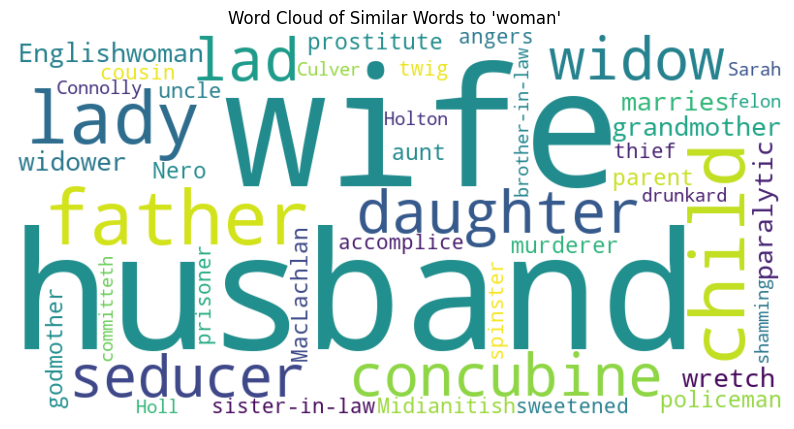

In [28]:
generate_wordcloud(model_1800_1899,'woman')

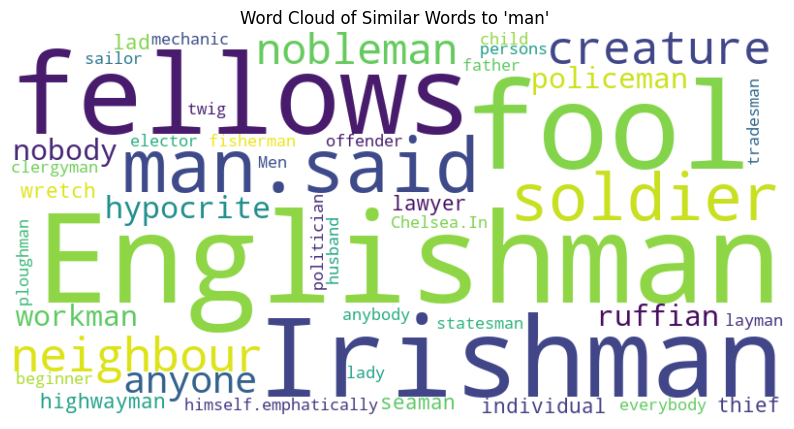

In [29]:
generate_wordcloud(model_1800_1899,'man')

In [5]:
path='/Users/praharshita/Desktop/Capstone/word-embedding-files/2000-2006.txt'
model_2000_2006=train_model(path)

2023-12-04 17:44:27,189 - INFO - collecting all words and their counts
2023-12-04 17:44:27,190 - INFO - PROGRESS: at sentence #0, processed 0 words, keeping 0 word types
2023-12-04 17:44:29,412 - INFO - collected 250921 word types from a corpus of 18842392 raw words and 2526 sentences
2023-12-04 17:44:29,412 - INFO - Creating a fresh vocabulary
2023-12-04 17:44:29,999 - INFO - Word2Vec lifecycle event {'msg': 'effective_min_count=1 retains 250921 unique words (100.00% of original 250921, drops 0)', 'datetime': '2023-12-04T17:44:29.999759', 'gensim': '4.3.1', 'python': '3.9.12 (main, Apr  5 2022, 01:53:17) \n[Clang 12.0.0 ]', 'platform': 'macOS-10.16-x86_64-i386-64bit', 'event': 'prepare_vocab'}
2023-12-04 17:44:30,000 - INFO - Word2Vec lifecycle event {'msg': 'effective_min_count=1 leaves 18842392 word corpus (100.00% of original 18842392, drops 0)', 'datetime': '2023-12-04T17:44:30.000300', 'gensim': '4.3.1', 'python': '3.9.12 (main, Apr  5 2022, 01:53:17) \n[Clang 12.0.0 ]', 'platfor

2023-12-04 17:45:08,532 - INFO - EPOCH 0 - PROGRESS: at 78.38% examples, 1682162 words/s, in_qsize 5, out_qsize 0
2023-12-04 17:45:09,535 - INFO - EPOCH 0 - PROGRESS: at 97.59% examples, 1680469 words/s, in_qsize 5, out_qsize 0
2023-12-04 17:45:09,660 - INFO - EPOCH 0: training on 18842392 raw words (10337641 effective words) took 6.2s, 1680817 effective words/s
2023-12-04 17:45:10,667 - INFO - EPOCH 1 - PROGRESS: at 15.40% examples, 1664386 words/s, in_qsize 5, out_qsize 0
2023-12-04 17:45:11,669 - INFO - EPOCH 1 - PROGRESS: at 33.29% examples, 1679340 words/s, in_qsize 5, out_qsize 0
2023-12-04 17:45:12,679 - INFO - EPOCH 1 - PROGRESS: at 47.62% examples, 1681369 words/s, in_qsize 5, out_qsize 0
2023-12-04 17:45:13,684 - INFO - EPOCH 1 - PROGRESS: at 62.39% examples, 1684460 words/s, in_qsize 5, out_qsize 0
2023-12-04 17:45:14,687 - INFO - EPOCH 1 - PROGRESS: at 78.50% examples, 1684260 words/s, in_qsize 5, out_qsize 0
2023-12-04 17:45:15,695 - INFO - EPOCH 1 - PROGRESS: at 98.22% ex

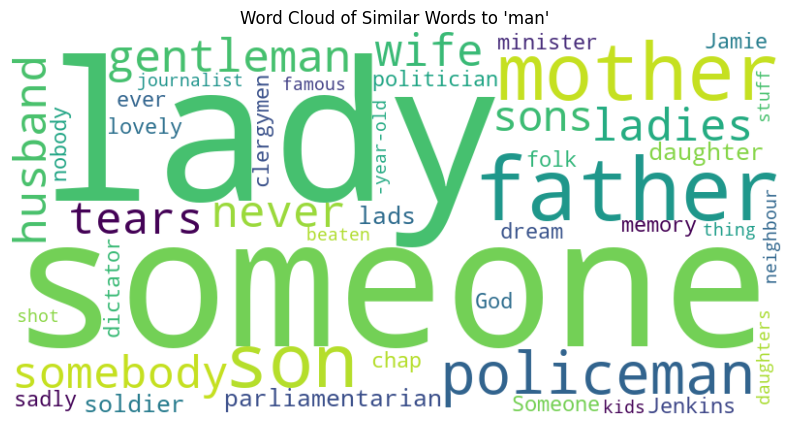

In [6]:
generate_wordcloud(model_2000_2006,'man')

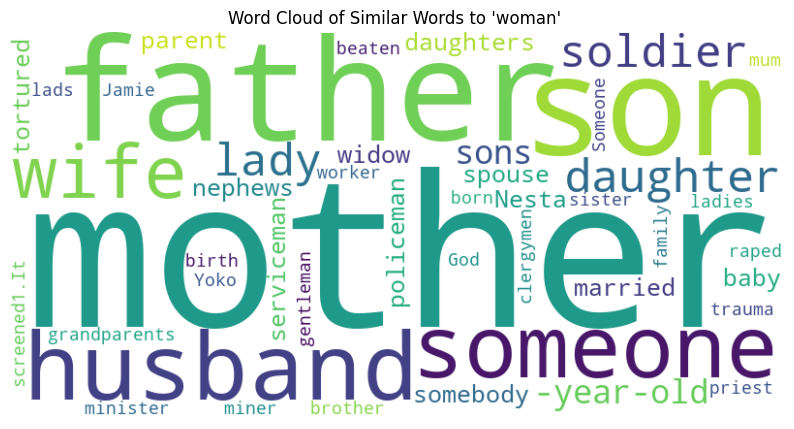

In [7]:
generate_wordcloud(model_2000_2006,'woman')

In [5]:
path='/Users/praharshita/Desktop/Capstone/word-embedding-files/1900-1999.txt'
model_1900_1999=train_model(path)

2023-12-05 13:45:50,354 - INFO - collecting all words and their counts
2023-12-05 13:45:50,359 - INFO - PROGRESS: at sentence #0, processed 0 words, keeping 0 word types
2023-12-05 13:45:53,589 - INFO - PROGRESS: at sentence #10000, processed 19058756 words, keeping 109504 word types
2023-12-05 13:45:57,888 - INFO - PROGRESS: at sentence #20000, processed 44904919 words, keeping 188026 word types
2023-12-05 13:46:00,979 - INFO - PROGRESS: at sentence #30000, processed 61729473 words, keeping 256587 word types
2023-12-05 13:46:04,023 - INFO - PROGRESS: at sentence #40000, processed 77373771 words, keeping 317031 word types
2023-12-05 13:46:07,523 - INFO - PROGRESS: at sentence #50000, processed 92805500 words, keeping 389742 word types
2023-12-05 13:46:09,873 - INFO - PROGRESS: at sentence #60000, processed 105185711 words, keeping 458843 word types
2023-12-05 13:46:12,909 - INFO - PROGRESS: at sentence #70000, processed 122271284 words, keeping 575386 word types
2023-12-05 13:46:16,557

2023-12-05 13:47:35,688 - INFO - EPOCH 0 - PROGRESS: at 31.07% examples, 1322129 words/s, in_qsize 5, out_qsize 0
2023-12-05 13:47:36,692 - INFO - EPOCH 0 - PROGRESS: at 31.82% examples, 1320809 words/s, in_qsize 5, out_qsize 0
2023-12-05 13:47:37,700 - INFO - EPOCH 0 - PROGRESS: at 32.66% examples, 1320581 words/s, in_qsize 5, out_qsize 0
2023-12-05 13:47:38,706 - INFO - EPOCH 0 - PROGRESS: at 33.50% examples, 1321142 words/s, in_qsize 5, out_qsize 0
2023-12-05 13:47:39,711 - INFO - EPOCH 0 - PROGRESS: at 34.28% examples, 1321412 words/s, in_qsize 5, out_qsize 0
2023-12-05 13:47:40,712 - INFO - EPOCH 0 - PROGRESS: at 35.25% examples, 1321566 words/s, in_qsize 5, out_qsize 0
2023-12-05 13:47:41,720 - INFO - EPOCH 0 - PROGRESS: at 36.02% examples, 1321406 words/s, in_qsize 5, out_qsize 0
2023-12-05 13:47:42,728 - INFO - EPOCH 0 - PROGRESS: at 36.97% examples, 1321683 words/s, in_qsize 5, out_qsize 0
2023-12-05 13:47:43,731 - INFO - EPOCH 0 - PROGRESS: at 38.11% examples, 1322040 words/s

2023-12-05 13:48:48,072 - INFO - EPOCH 0 - PROGRESS: at 88.18% examples, 1299533 words/s, in_qsize 5, out_qsize 0
2023-12-05 13:48:49,079 - INFO - EPOCH 0 - PROGRESS: at 88.61% examples, 1299585 words/s, in_qsize 5, out_qsize 0
2023-12-05 13:48:50,080 - INFO - EPOCH 0 - PROGRESS: at 89.20% examples, 1299551 words/s, in_qsize 5, out_qsize 0
2023-12-05 13:48:51,085 - INFO - EPOCH 0 - PROGRESS: at 89.80% examples, 1299504 words/s, in_qsize 5, out_qsize 0
2023-12-05 13:48:52,090 - INFO - EPOCH 0 - PROGRESS: at 90.24% examples, 1299294 words/s, in_qsize 5, out_qsize 0
2023-12-05 13:48:53,094 - INFO - EPOCH 0 - PROGRESS: at 90.72% examples, 1299461 words/s, in_qsize 6, out_qsize 0
2023-12-05 13:48:54,096 - INFO - EPOCH 0 - PROGRESS: at 91.23% examples, 1299695 words/s, in_qsize 5, out_qsize 0
2023-12-05 13:48:55,099 - INFO - EPOCH 0 - PROGRESS: at 91.71% examples, 1299694 words/s, in_qsize 5, out_qsize 0
2023-12-05 13:48:56,114 - INFO - EPOCH 0 - PROGRESS: at 92.19% examples, 1299791 words/s

2023-12-05 13:49:59,444 - INFO - EPOCH 1 - PROGRESS: at 33.04% examples, 1331532 words/s, in_qsize 5, out_qsize 0
2023-12-05 13:50:00,446 - INFO - EPOCH 1 - PROGRESS: at 33.78% examples, 1331842 words/s, in_qsize 5, out_qsize 0
2023-12-05 13:50:01,446 - INFO - EPOCH 1 - PROGRESS: at 34.62% examples, 1331640 words/s, in_qsize 5, out_qsize 0
2023-12-05 13:50:02,449 - INFO - EPOCH 1 - PROGRESS: at 35.45% examples, 1331999 words/s, in_qsize 5, out_qsize 0
2023-12-05 13:50:03,480 - INFO - EPOCH 1 - PROGRESS: at 36.33% examples, 1330762 words/s, in_qsize 5, out_qsize 0
2023-12-05 13:50:04,491 - INFO - EPOCH 1 - PROGRESS: at 37.50% examples, 1330147 words/s, in_qsize 5, out_qsize 0
2023-12-05 13:50:05,491 - INFO - EPOCH 1 - PROGRESS: at 38.52% examples, 1329808 words/s, in_qsize 6, out_qsize 0
2023-12-05 13:50:06,501 - INFO - EPOCH 1 - PROGRESS: at 39.29% examples, 1329458 words/s, in_qsize 5, out_qsize 0
2023-12-05 13:50:07,502 - INFO - EPOCH 1 - PROGRESS: at 39.87% examples, 1329475 words/s

2023-12-05 13:51:11,835 - INFO - EPOCH 1 - PROGRESS: at 90.01% examples, 1315229 words/s, in_qsize 6, out_qsize 1
2023-12-05 13:51:12,852 - INFO - EPOCH 1 - PROGRESS: at 90.52% examples, 1314970 words/s, in_qsize 5, out_qsize 0
2023-12-05 13:51:13,856 - INFO - EPOCH 1 - PROGRESS: at 90.90% examples, 1314757 words/s, in_qsize 5, out_qsize 0
2023-12-05 13:51:14,862 - INFO - EPOCH 1 - PROGRESS: at 91.44% examples, 1314675 words/s, in_qsize 3, out_qsize 2
2023-12-05 13:51:15,862 - INFO - EPOCH 1 - PROGRESS: at 91.91% examples, 1314541 words/s, in_qsize 5, out_qsize 0
2023-12-05 13:51:16,872 - INFO - EPOCH 1 - PROGRESS: at 92.41% examples, 1314633 words/s, in_qsize 5, out_qsize 0
2023-12-05 13:51:17,873 - INFO - EPOCH 1 - PROGRESS: at 92.94% examples, 1314701 words/s, in_qsize 5, out_qsize 0
2023-12-05 13:51:18,878 - INFO - EPOCH 1 - PROGRESS: at 93.44% examples, 1314665 words/s, in_qsize 5, out_qsize 0
2023-12-05 13:51:19,878 - INFO - EPOCH 1 - PROGRESS: at 93.92% examples, 1314489 words/s

2023-12-05 13:52:24,021 - INFO - EPOCH 2 - PROGRESS: at 36.34% examples, 1331734 words/s, in_qsize 5, out_qsize 2
2023-12-05 13:52:25,023 - INFO - EPOCH 2 - PROGRESS: at 37.50% examples, 1330970 words/s, in_qsize 5, out_qsize 0
2023-12-05 13:52:26,036 - INFO - EPOCH 2 - PROGRESS: at 38.53% examples, 1330747 words/s, in_qsize 5, out_qsize 0
2023-12-05 13:52:27,040 - INFO - EPOCH 2 - PROGRESS: at 39.30% examples, 1330626 words/s, in_qsize 5, out_qsize 0
2023-12-05 13:52:28,046 - INFO - EPOCH 2 - PROGRESS: at 39.88% examples, 1330638 words/s, in_qsize 5, out_qsize 0
2023-12-05 13:52:29,048 - INFO - EPOCH 2 - PROGRESS: at 40.66% examples, 1329804 words/s, in_qsize 5, out_qsize 0
2023-12-05 13:52:30,052 - INFO - EPOCH 2 - PROGRESS: at 41.27% examples, 1329102 words/s, in_qsize 5, out_qsize 0
2023-12-05 13:52:31,052 - INFO - EPOCH 2 - PROGRESS: at 42.06% examples, 1328090 words/s, in_qsize 5, out_qsize 0
2023-12-05 13:52:32,054 - INFO - EPOCH 2 - PROGRESS: at 42.94% examples, 1327052 words/s

2023-12-05 13:53:36,396 - INFO - EPOCH 2 - PROGRESS: at 91.78% examples, 1312308 words/s, in_qsize 5, out_qsize 0
2023-12-05 13:53:37,400 - INFO - EPOCH 2 - PROGRESS: at 92.31% examples, 1312247 words/s, in_qsize 5, out_qsize 0
2023-12-05 13:53:38,402 - INFO - EPOCH 2 - PROGRESS: at 92.81% examples, 1312337 words/s, in_qsize 5, out_qsize 0
2023-12-05 13:53:39,410 - INFO - EPOCH 2 - PROGRESS: at 93.31% examples, 1312081 words/s, in_qsize 5, out_qsize 0
2023-12-05 13:53:40,414 - INFO - EPOCH 2 - PROGRESS: at 93.80% examples, 1312012 words/s, in_qsize 5, out_qsize 0
2023-12-05 13:53:41,430 - INFO - EPOCH 2 - PROGRESS: at 94.24% examples, 1311981 words/s, in_qsize 5, out_qsize 0
2023-12-05 13:53:42,434 - INFO - EPOCH 2 - PROGRESS: at 94.71% examples, 1311849 words/s, in_qsize 5, out_qsize 0
2023-12-05 13:53:43,435 - INFO - EPOCH 2 - PROGRESS: at 95.24% examples, 1311811 words/s, in_qsize 5, out_qsize 0
2023-12-05 13:53:44,437 - INFO - EPOCH 2 - PROGRESS: at 95.65% examples, 1311679 words/s

2023-12-05 13:54:48,392 - INFO - EPOCH 3 - PROGRESS: at 39.89% examples, 1332349 words/s, in_qsize 5, out_qsize 0
2023-12-05 13:54:49,397 - INFO - EPOCH 3 - PROGRESS: at 40.71% examples, 1332068 words/s, in_qsize 5, out_qsize 0
2023-12-05 13:54:50,397 - INFO - EPOCH 3 - PROGRESS: at 41.34% examples, 1331609 words/s, in_qsize 5, out_qsize 0
2023-12-05 13:54:51,397 - INFO - EPOCH 3 - PROGRESS: at 42.13% examples, 1331063 words/s, in_qsize 5, out_qsize 0
2023-12-05 13:54:52,407 - INFO - EPOCH 3 - PROGRESS: at 43.03% examples, 1330908 words/s, in_qsize 5, out_qsize 0
2023-12-05 13:54:53,408 - INFO - EPOCH 3 - PROGRESS: at 43.74% examples, 1331028 words/s, in_qsize 5, out_qsize 0
2023-12-05 13:54:54,410 - INFO - EPOCH 3 - PROGRESS: at 44.88% examples, 1330916 words/s, in_qsize 5, out_qsize 0
2023-12-05 13:54:55,419 - INFO - EPOCH 3 - PROGRESS: at 46.01% examples, 1330945 words/s, in_qsize 5, out_qsize 0
2023-12-05 13:54:56,421 - INFO - EPOCH 3 - PROGRESS: at 47.24% examples, 1330782 words/s

2023-12-05 13:56:00,719 - INFO - EPOCH 3 - PROGRESS: at 94.00% examples, 1317268 words/s, in_qsize 4, out_qsize 1
2023-12-05 13:56:01,730 - INFO - EPOCH 3 - PROGRESS: at 94.46% examples, 1317269 words/s, in_qsize 5, out_qsize 0
2023-12-05 13:56:02,730 - INFO - EPOCH 3 - PROGRESS: at 94.92% examples, 1317267 words/s, in_qsize 5, out_qsize 0
2023-12-05 13:56:03,732 - INFO - EPOCH 3 - PROGRESS: at 95.41% examples, 1317165 words/s, in_qsize 5, out_qsize 0
2023-12-05 13:56:04,734 - INFO - EPOCH 3 - PROGRESS: at 95.83% examples, 1317133 words/s, in_qsize 5, out_qsize 0
2023-12-05 13:56:05,737 - INFO - EPOCH 3 - PROGRESS: at 96.33% examples, 1316955 words/s, in_qsize 5, out_qsize 0
2023-12-05 13:56:06,740 - INFO - EPOCH 3 - PROGRESS: at 96.79% examples, 1316508 words/s, in_qsize 5, out_qsize 0
2023-12-05 13:56:07,754 - INFO - EPOCH 3 - PROGRESS: at 97.13% examples, 1316119 words/s, in_qsize 5, out_qsize 0
2023-12-05 13:56:08,757 - INFO - EPOCH 3 - PROGRESS: at 97.54% examples, 1316063 words/s

2023-12-05 13:57:12,452 - INFO - EPOCH 4 - PROGRESS: at 42.98% examples, 1327705 words/s, in_qsize 5, out_qsize 0
2023-12-05 13:57:13,454 - INFO - EPOCH 4 - PROGRESS: at 43.65% examples, 1328031 words/s, in_qsize 5, out_qsize 0
2023-12-05 13:57:14,455 - INFO - EPOCH 4 - PROGRESS: at 44.82% examples, 1327766 words/s, in_qsize 5, out_qsize 0
2023-12-05 13:57:15,471 - INFO - EPOCH 4 - PROGRESS: at 45.88% examples, 1327265 words/s, in_qsize 5, out_qsize 0
2023-12-05 13:57:16,474 - INFO - EPOCH 4 - PROGRESS: at 47.12% examples, 1327315 words/s, in_qsize 5, out_qsize 0
2023-12-05 13:57:17,482 - INFO - EPOCH 4 - PROGRESS: at 48.51% examples, 1327330 words/s, in_qsize 5, out_qsize 0
2023-12-05 13:57:18,484 - INFO - EPOCH 4 - PROGRESS: at 49.48% examples, 1327310 words/s, in_qsize 5, out_qsize 0
2023-12-05 13:57:19,485 - INFO - EPOCH 4 - PROGRESS: at 50.53% examples, 1327126 words/s, in_qsize 5, out_qsize 0
2023-12-05 13:57:20,488 - INFO - EPOCH 4 - PROGRESS: at 51.78% examples, 1327088 words/s

2023-12-05 13:58:24,781 - INFO - EPOCH 4 - PROGRESS: at 95.66% examples, 1312404 words/s, in_qsize 5, out_qsize 0
2023-12-05 13:58:25,787 - INFO - EPOCH 4 - PROGRESS: at 96.12% examples, 1312344 words/s, in_qsize 5, out_qsize 0
2023-12-05 13:58:26,789 - INFO - EPOCH 4 - PROGRESS: at 96.61% examples, 1312265 words/s, in_qsize 5, out_qsize 0
2023-12-05 13:58:27,792 - INFO - EPOCH 4 - PROGRESS: at 97.02% examples, 1312079 words/s, in_qsize 5, out_qsize 0
2023-12-05 13:58:28,799 - INFO - EPOCH 4 - PROGRESS: at 97.38% examples, 1311950 words/s, in_qsize 5, out_qsize 0
2023-12-05 13:58:29,800 - INFO - EPOCH 4 - PROGRESS: at 97.72% examples, 1311750 words/s, in_qsize 5, out_qsize 0
2023-12-05 13:58:30,800 - INFO - EPOCH 4 - PROGRESS: at 98.04% examples, 1311567 words/s, in_qsize 5, out_qsize 0
2023-12-05 13:58:31,803 - INFO - EPOCH 4 - PROGRESS: at 98.43% examples, 1311483 words/s, in_qsize 5, out_qsize 0
2023-12-05 13:58:32,805 - INFO - EPOCH 4 - PROGRESS: at 98.79% examples, 1311375 words/s

2023-12-05 13:59:25,725 - INFO - EPOCH 0 - PROGRESS: at 37.67% examples, 1335498 words/s, in_qsize 5, out_qsize 0
2023-12-05 13:59:26,735 - INFO - EPOCH 0 - PROGRESS: at 38.69% examples, 1335775 words/s, in_qsize 5, out_qsize 0
2023-12-05 13:59:27,737 - INFO - EPOCH 0 - PROGRESS: at 39.43% examples, 1335563 words/s, in_qsize 5, out_qsize 0
2023-12-05 13:59:28,746 - INFO - EPOCH 0 - PROGRESS: at 39.99% examples, 1335827 words/s, in_qsize 5, out_qsize 0
2023-12-05 13:59:29,746 - INFO - EPOCH 0 - PROGRESS: at 40.82% examples, 1335512 words/s, in_qsize 5, out_qsize 0
2023-12-05 13:59:30,749 - INFO - EPOCH 0 - PROGRESS: at 41.50% examples, 1335197 words/s, in_qsize 5, out_qsize 0
2023-12-05 13:59:31,752 - INFO - EPOCH 0 - PROGRESS: at 42.25% examples, 1334833 words/s, in_qsize 5, out_qsize 0
2023-12-05 13:59:32,754 - INFO - EPOCH 0 - PROGRESS: at 43.15% examples, 1334311 words/s, in_qsize 5, out_qsize 0
2023-12-05 13:59:33,757 - INFO - EPOCH 0 - PROGRESS: at 44.03% examples, 1334200 words/s

2023-12-05 14:00:38,110 - INFO - EPOCH 0 - PROGRESS: at 92.52% examples, 1317306 words/s, in_qsize 5, out_qsize 0
2023-12-05 14:00:39,115 - INFO - EPOCH 0 - PROGRESS: at 93.05% examples, 1317122 words/s, in_qsize 5, out_qsize 0
2023-12-05 14:00:40,121 - INFO - EPOCH 0 - PROGRESS: at 93.55% examples, 1317064 words/s, in_qsize 5, out_qsize 0
2023-12-05 14:00:41,127 - INFO - EPOCH 0 - PROGRESS: at 94.00% examples, 1316735 words/s, in_qsize 5, out_qsize 0
2023-12-05 14:00:42,134 - INFO - EPOCH 0 - PROGRESS: at 94.47% examples, 1316547 words/s, in_qsize 5, out_qsize 0
2023-12-05 14:00:43,135 - INFO - EPOCH 0 - PROGRESS: at 94.92% examples, 1316450 words/s, in_qsize 5, out_qsize 0
2023-12-05 14:00:44,139 - INFO - EPOCH 0 - PROGRESS: at 95.40% examples, 1316165 words/s, in_qsize 5, out_qsize 0
2023-12-05 14:00:45,140 - INFO - EPOCH 0 - PROGRESS: at 95.82% examples, 1315994 words/s, in_qsize 5, out_qsize 0
2023-12-05 14:00:46,144 - INFO - EPOCH 0 - PROGRESS: at 96.31% examples, 1315840 words/s

2023-12-05 14:01:49,893 - INFO - EPOCH 1 - PROGRESS: at 40.64% examples, 1329011 words/s, in_qsize 5, out_qsize 0
2023-12-05 14:01:50,895 - INFO - EPOCH 1 - PROGRESS: at 41.26% examples, 1328331 words/s, in_qsize 5, out_qsize 0
2023-12-05 14:01:51,896 - INFO - EPOCH 1 - PROGRESS: at 42.06% examples, 1327958 words/s, in_qsize 5, out_qsize 0
2023-12-05 14:01:52,897 - INFO - EPOCH 1 - PROGRESS: at 42.97% examples, 1328125 words/s, in_qsize 5, out_qsize 0
2023-12-05 14:01:53,904 - INFO - EPOCH 1 - PROGRESS: at 43.64% examples, 1328139 words/s, in_qsize 5, out_qsize 0
2023-12-05 14:01:54,914 - INFO - EPOCH 1 - PROGRESS: at 44.80% examples, 1328214 words/s, in_qsize 5, out_qsize 0
2023-12-05 14:01:55,918 - INFO - EPOCH 1 - PROGRESS: at 45.86% examples, 1327850 words/s, in_qsize 5, out_qsize 0
2023-12-05 14:01:56,925 - INFO - EPOCH 1 - PROGRESS: at 47.12% examples, 1328002 words/s, in_qsize 5, out_qsize 0
2023-12-05 14:01:57,926 - INFO - EPOCH 1 - PROGRESS: at 48.51% examples, 1328116 words/s

2023-12-05 14:03:02,255 - INFO - EPOCH 1 - PROGRESS: at 94.53% examples, 1318577 words/s, in_qsize 5, out_qsize 0
2023-12-05 14:03:03,257 - INFO - EPOCH 1 - PROGRESS: at 95.00% examples, 1318037 words/s, in_qsize 5, out_qsize 0
2023-12-05 14:03:04,258 - INFO - EPOCH 1 - PROGRESS: at 95.45% examples, 1317793 words/s, in_qsize 5, out_qsize 0
2023-12-05 14:03:05,262 - INFO - EPOCH 1 - PROGRESS: at 95.85% examples, 1317707 words/s, in_qsize 5, out_qsize 0
2023-12-05 14:03:06,263 - INFO - EPOCH 1 - PROGRESS: at 96.35% examples, 1317265 words/s, in_qsize 5, out_qsize 0
2023-12-05 14:03:07,265 - INFO - EPOCH 1 - PROGRESS: at 96.81% examples, 1316921 words/s, in_qsize 5, out_qsize 0
2023-12-05 14:03:08,270 - INFO - EPOCH 1 - PROGRESS: at 97.14% examples, 1316879 words/s, in_qsize 5, out_qsize 0
2023-12-05 14:03:09,280 - INFO - EPOCH 1 - PROGRESS: at 97.56% examples, 1316672 words/s, in_qsize 5, out_qsize 0
2023-12-05 14:03:10,281 - INFO - EPOCH 1 - PROGRESS: at 97.85% examples, 1316130 words/s

2023-12-05 14:04:13,738 - INFO - EPOCH 2 - PROGRESS: at 43.78% examples, 1332803 words/s, in_qsize 5, out_qsize 0
2023-12-05 14:04:14,739 - INFO - EPOCH 2 - PROGRESS: at 45.02% examples, 1332601 words/s, in_qsize 5, out_qsize 0
2023-12-05 14:04:15,746 - INFO - EPOCH 2 - PROGRESS: at 46.02% examples, 1332296 words/s, in_qsize 5, out_qsize 0
2023-12-05 14:04:16,748 - INFO - EPOCH 2 - PROGRESS: at 47.26% examples, 1332089 words/s, in_qsize 5, out_qsize 0
2023-12-05 14:04:17,764 - INFO - EPOCH 2 - PROGRESS: at 48.65% examples, 1331733 words/s, in_qsize 5, out_qsize 0
2023-12-05 14:04:18,776 - INFO - EPOCH 2 - PROGRESS: at 49.59% examples, 1331304 words/s, in_qsize 6, out_qsize 1
2023-12-05 14:04:19,776 - INFO - EPOCH 2 - PROGRESS: at 50.66% examples, 1331632 words/s, in_qsize 5, out_qsize 0
2023-12-05 14:04:20,779 - INFO - EPOCH 2 - PROGRESS: at 51.91% examples, 1330501 words/s, in_qsize 5, out_qsize 0
2023-12-05 14:04:21,787 - INFO - EPOCH 2 - PROGRESS: at 53.03% examples, 1329471 words/s

2023-12-05 14:05:26,123 - INFO - EPOCH 2 - PROGRESS: at 96.25% examples, 1315103 words/s, in_qsize 6, out_qsize 0
2023-12-05 14:05:27,125 - INFO - EPOCH 2 - PROGRESS: at 96.70% examples, 1314601 words/s, in_qsize 5, out_qsize 0
2023-12-05 14:05:28,133 - INFO - EPOCH 2 - PROGRESS: at 97.07% examples, 1314232 words/s, in_qsize 5, out_qsize 0
2023-12-05 14:05:29,141 - INFO - EPOCH 2 - PROGRESS: at 97.43% examples, 1313284 words/s, in_qsize 5, out_qsize 0
2023-12-05 14:05:30,143 - INFO - EPOCH 2 - PROGRESS: at 97.73% examples, 1312372 words/s, in_qsize 5, out_qsize 0
2023-12-05 14:05:31,146 - INFO - EPOCH 2 - PROGRESS: at 98.05% examples, 1312211 words/s, in_qsize 5, out_qsize 0
2023-12-05 14:05:32,155 - INFO - EPOCH 2 - PROGRESS: at 98.44% examples, 1311972 words/s, in_qsize 5, out_qsize 0
2023-12-05 14:05:33,169 - INFO - EPOCH 2 - PROGRESS: at 98.80% examples, 1311808 words/s, in_qsize 5, out_qsize 0
2023-12-05 14:05:34,169 - INFO - EPOCH 2 - PROGRESS: at 99.17% examples, 1311846 words/s

2023-12-05 14:06:38,048 - INFO - EPOCH 3 - PROGRESS: at 48.70% examples, 1332467 words/s, in_qsize 5, out_qsize 0
2023-12-05 14:06:39,056 - INFO - EPOCH 3 - PROGRESS: at 49.64% examples, 1332157 words/s, in_qsize 5, out_qsize 0
2023-12-05 14:06:40,061 - INFO - EPOCH 3 - PROGRESS: at 50.72% examples, 1331866 words/s, in_qsize 5, out_qsize 0
2023-12-05 14:06:41,062 - INFO - EPOCH 3 - PROGRESS: at 52.04% examples, 1331421 words/s, in_qsize 5, out_qsize 0
2023-12-05 14:06:42,063 - INFO - EPOCH 3 - PROGRESS: at 53.16% examples, 1331744 words/s, in_qsize 5, out_qsize 0
2023-12-05 14:06:43,070 - INFO - EPOCH 3 - PROGRESS: at 54.37% examples, 1331518 words/s, in_qsize 5, out_qsize 0
2023-12-05 14:06:44,074 - INFO - EPOCH 3 - PROGRESS: at 55.32% examples, 1331573 words/s, in_qsize 5, out_qsize 0
2023-12-05 14:06:45,076 - INFO - EPOCH 3 - PROGRESS: at 56.69% examples, 1331554 words/s, in_qsize 5, out_qsize 0
2023-12-05 14:06:46,078 - INFO - EPOCH 3 - PROGRESS: at 57.62% examples, 1331355 words/s

2023-12-05 14:07:50,422 - INFO - EPOCH 3 - PROGRESS: at 97.95% examples, 1318588 words/s, in_qsize 5, out_qsize 0
2023-12-05 14:07:51,437 - INFO - EPOCH 3 - PROGRESS: at 98.36% examples, 1318392 words/s, in_qsize 5, out_qsize 0
2023-12-05 14:07:52,447 - INFO - EPOCH 3 - PROGRESS: at 98.70% examples, 1318316 words/s, in_qsize 5, out_qsize 0
2023-12-05 14:07:53,447 - INFO - EPOCH 3 - PROGRESS: at 99.05% examples, 1318306 words/s, in_qsize 5, out_qsize 0
2023-12-05 14:07:54,448 - INFO - EPOCH 3 - PROGRESS: at 99.37% examples, 1318267 words/s, in_qsize 5, out_qsize 0
2023-12-05 14:07:55,449 - INFO - EPOCH 3 - PROGRESS: at 99.72% examples, 1318143 words/s, in_qsize 5, out_qsize 0
2023-12-05 14:07:56,310 - INFO - EPOCH 3: training on 219959488 raw words (183952173 effective words) took 139.6s, 1318126 effective words/s
2023-12-05 14:07:57,319 - INFO - EPOCH 4 - PROGRESS: at 0.79% examples, 1352650 words/s, in_qsize 5, out_qsize 0
2023-12-05 14:07:58,324 - INFO - EPOCH 4 - PROGRESS: at 1.91% 

2023-12-05 14:09:02,705 - INFO - EPOCH 4 - PROGRESS: at 53.27% examples, 1312178 words/s, in_qsize 5, out_qsize 0
2023-12-05 14:09:03,710 - INFO - EPOCH 4 - PROGRESS: at 54.50% examples, 1312056 words/s, in_qsize 5, out_qsize 0
2023-12-05 14:09:04,714 - INFO - EPOCH 4 - PROGRESS: at 55.40% examples, 1312048 words/s, in_qsize 5, out_qsize 0
2023-12-05 14:09:05,719 - INFO - EPOCH 4 - PROGRESS: at 56.73% examples, 1312347 words/s, in_qsize 5, out_qsize 0
2023-12-05 14:09:06,723 - INFO - EPOCH 4 - PROGRESS: at 57.66% examples, 1310954 words/s, in_qsize 5, out_qsize 0
2023-12-05 14:09:07,736 - INFO - EPOCH 4 - PROGRESS: at 58.82% examples, 1310718 words/s, in_qsize 5, out_qsize 0
2023-12-05 14:09:08,739 - INFO - EPOCH 4 - PROGRESS: at 59.77% examples, 1310439 words/s, in_qsize 5, out_qsize 0
2023-12-05 14:09:09,751 - INFO - EPOCH 4 - PROGRESS: at 60.96% examples, 1309744 words/s, in_qsize 5, out_qsize 0
2023-12-05 14:09:10,752 - INFO - EPOCH 4 - PROGRESS: at 62.04% examples, 1309389 words/s

2023-12-05 14:10:15,092 - INFO - EPOCH 4 - PROGRESS: at 99.18% examples, 1301820 words/s, in_qsize 5, out_qsize 0
2023-12-05 14:10:16,103 - INFO - EPOCH 4 - PROGRESS: at 99.52% examples, 1301748 words/s, in_qsize 5, out_qsize 0
2023-12-05 14:10:17,103 - INFO - EPOCH 4 - PROGRESS: at 99.81% examples, 1301612 words/s, in_qsize 5, out_qsize 0
2023-12-05 14:10:17,629 - INFO - EPOCH 4: training on 219959488 raw words (183953150 effective words) took 141.3s, 1301662 effective words/s
2023-12-05 14:10:18,637 - INFO - EPOCH 5 - PROGRESS: at 0.77% examples, 1323745 words/s, in_qsize 5, out_qsize 0
2023-12-05 14:10:19,638 - INFO - EPOCH 5 - PROGRESS: at 1.89% examples, 1336443 words/s, in_qsize 5, out_qsize 0
2023-12-05 14:10:20,640 - INFO - EPOCH 5 - PROGRESS: at 2.72% examples, 1321186 words/s, in_qsize 5, out_qsize 0
2023-12-05 14:10:21,642 - INFO - EPOCH 5 - PROGRESS: at 3.64% examples, 1324926 words/s, in_qsize 5, out_qsize 0
2023-12-05 14:10:22,646 - INFO - EPOCH 5 - PROGRESS: at 4.28% exa

2023-12-05 14:11:26,959 - INFO - EPOCH 5 - PROGRESS: at 57.02% examples, 1321731 words/s, in_qsize 5, out_qsize 0
2023-12-05 14:11:27,973 - INFO - EPOCH 5 - PROGRESS: at 58.26% examples, 1321743 words/s, in_qsize 5, out_qsize 0
2023-12-05 14:11:28,980 - INFO - EPOCH 5 - PROGRESS: at 59.31% examples, 1321530 words/s, in_qsize 5, out_qsize 0
2023-12-05 14:11:29,989 - INFO - EPOCH 5 - PROGRESS: at 60.55% examples, 1321545 words/s, in_qsize 5, out_qsize 0
2023-12-05 14:11:30,992 - INFO - EPOCH 5 - PROGRESS: at 61.50% examples, 1321473 words/s, in_qsize 5, out_qsize 0
2023-12-05 14:11:31,998 - INFO - EPOCH 5 - PROGRESS: at 62.39% examples, 1321485 words/s, in_qsize 5, out_qsize 0
2023-12-05 14:11:32,998 - INFO - EPOCH 5 - PROGRESS: at 63.09% examples, 1321404 words/s, in_qsize 5, out_qsize 0
2023-12-05 14:11:34,007 - INFO - EPOCH 5 - PROGRESS: at 64.00% examples, 1321334 words/s, in_qsize 5, out_qsize 0
2023-12-05 14:11:35,010 - INFO - EPOCH 5 - PROGRESS: at 64.78% examples, 1320680 words/s

2023-12-05 14:12:38,766 - INFO - EPOCH 6 - PROGRESS: at 0.78% examples, 1337476 words/s, in_qsize 5, out_qsize 0
2023-12-05 14:12:39,780 - INFO - EPOCH 6 - PROGRESS: at 1.90% examples, 1344997 words/s, in_qsize 5, out_qsize 0
2023-12-05 14:12:40,785 - INFO - EPOCH 6 - PROGRESS: at 2.80% examples, 1345155 words/s, in_qsize 5, out_qsize 0
2023-12-05 14:12:41,790 - INFO - EPOCH 6 - PROGRESS: at 3.69% examples, 1345101 words/s, in_qsize 5, out_qsize 0
2023-12-05 14:12:42,791 - INFO - EPOCH 6 - PROGRESS: at 4.35% examples, 1348038 words/s, in_qsize 5, out_qsize 0
2023-12-05 14:12:43,798 - INFO - EPOCH 6 - PROGRESS: at 4.95% examples, 1348615 words/s, in_qsize 5, out_qsize 0
2023-12-05 14:12:44,802 - INFO - EPOCH 6 - PROGRESS: at 5.50% examples, 1347163 words/s, in_qsize 5, out_qsize 0
2023-12-05 14:12:45,806 - INFO - EPOCH 6 - PROGRESS: at 6.17% examples, 1347346 words/s, in_qsize 5, out_qsize 0
2023-12-05 14:12:46,806 - INFO - EPOCH 6 - PROGRESS: at 7.17% examples, 1346240 words/s, in_qsiz

2023-12-05 14:13:51,182 - INFO - EPOCH 6 - PROGRESS: at 61.31% examples, 1316511 words/s, in_qsize 5, out_qsize 0
2023-12-05 14:13:52,186 - INFO - EPOCH 6 - PROGRESS: at 62.26% examples, 1315965 words/s, in_qsize 5, out_qsize 0
2023-12-05 14:13:53,186 - INFO - EPOCH 6 - PROGRESS: at 62.91% examples, 1315871 words/s, in_qsize 5, out_qsize 0
2023-12-05 14:13:54,188 - INFO - EPOCH 6 - PROGRESS: at 63.74% examples, 1315460 words/s, in_qsize 5, out_qsize 0
2023-12-05 14:13:55,188 - INFO - EPOCH 6 - PROGRESS: at 64.56% examples, 1315393 words/s, in_qsize 5, out_qsize 0
2023-12-05 14:13:56,201 - INFO - EPOCH 6 - PROGRESS: at 65.36% examples, 1315129 words/s, in_qsize 5, out_qsize 0
2023-12-05 14:13:57,209 - INFO - EPOCH 6 - PROGRESS: at 66.07% examples, 1314966 words/s, in_qsize 5, out_qsize 0
2023-12-05 14:13:58,209 - INFO - EPOCH 6 - PROGRESS: at 66.73% examples, 1314990 words/s, in_qsize 5, out_qsize 0
2023-12-05 14:13:59,223 - INFO - EPOCH 6 - PROGRESS: at 67.47% examples, 1314808 words/s

2023-12-05 14:15:02,583 - INFO - EPOCH 7 - PROGRESS: at 3.64% examples, 1319235 words/s, in_qsize 5, out_qsize 0
2023-12-05 14:15:03,587 - INFO - EPOCH 7 - PROGRESS: at 4.28% examples, 1324462 words/s, in_qsize 5, out_qsize 0
2023-12-05 14:15:04,589 - INFO - EPOCH 7 - PROGRESS: at 4.89% examples, 1319619 words/s, in_qsize 5, out_qsize 0
2023-12-05 14:15:05,591 - INFO - EPOCH 7 - PROGRESS: at 5.34% examples, 1320630 words/s, in_qsize 5, out_qsize 0
2023-12-05 14:15:06,597 - INFO - EPOCH 7 - PROGRESS: at 6.08% examples, 1322817 words/s, in_qsize 5, out_qsize 0
2023-12-05 14:15:07,597 - INFO - EPOCH 7 - PROGRESS: at 7.05% examples, 1324783 words/s, in_qsize 5, out_qsize 0
2023-12-05 14:15:08,607 - INFO - EPOCH 7 - PROGRESS: at 7.64% examples, 1325811 words/s, in_qsize 5, out_qsize 0
2023-12-05 14:15:09,619 - INFO - EPOCH 7 - PROGRESS: at 8.35% examples, 1326046 words/s, in_qsize 5, out_qsize 0
2023-12-05 14:15:10,622 - INFO - EPOCH 7 - PROGRESS: at 9.11% examples, 1327314 words/s, in_qsiz

2023-12-05 14:16:14,951 - INFO - EPOCH 7 - PROGRESS: at 63.83% examples, 1317931 words/s, in_qsize 5, out_qsize 0
2023-12-05 14:16:15,963 - INFO - EPOCH 7 - PROGRESS: at 64.64% examples, 1317590 words/s, in_qsize 5, out_qsize 0
2023-12-05 14:16:16,968 - INFO - EPOCH 7 - PROGRESS: at 65.43% examples, 1317246 words/s, in_qsize 5, out_qsize 0
2023-12-05 14:16:17,975 - INFO - EPOCH 7 - PROGRESS: at 66.13% examples, 1317161 words/s, in_qsize 5, out_qsize 0
2023-12-05 14:16:18,982 - INFO - EPOCH 7 - PROGRESS: at 66.85% examples, 1317180 words/s, in_qsize 5, out_qsize 0
2023-12-05 14:16:19,984 - INFO - EPOCH 7 - PROGRESS: at 67.56% examples, 1316902 words/s, in_qsize 5, out_qsize 0
2023-12-05 14:16:20,989 - INFO - EPOCH 7 - PROGRESS: at 68.42% examples, 1316870 words/s, in_qsize 6, out_qsize 0
2023-12-05 14:16:21,989 - INFO - EPOCH 7 - PROGRESS: at 69.03% examples, 1316599 words/s, in_qsize 5, out_qsize 0
2023-12-05 14:16:22,991 - INFO - EPOCH 7 - PROGRESS: at 69.77% examples, 1316283 words/s

2023-12-05 14:17:27,028 - INFO - EPOCH 8 - PROGRESS: at 5.42% examples, 1332881 words/s, in_qsize 5, out_qsize 0
2023-12-05 14:17:28,035 - INFO - EPOCH 8 - PROGRESS: at 6.11% examples, 1331576 words/s, in_qsize 5, out_qsize 0
2023-12-05 14:17:29,043 - INFO - EPOCH 8 - PROGRESS: at 7.07% examples, 1326211 words/s, in_qsize 5, out_qsize 0
2023-12-05 14:17:30,053 - INFO - EPOCH 8 - PROGRESS: at 7.65% examples, 1327175 words/s, in_qsize 5, out_qsize 0
2023-12-05 14:17:31,054 - INFO - EPOCH 8 - PROGRESS: at 8.36% examples, 1327423 words/s, in_qsize 5, out_qsize 0
2023-12-05 14:17:32,061 - INFO - EPOCH 8 - PROGRESS: at 9.12% examples, 1328397 words/s, in_qsize 5, out_qsize 0
2023-12-05 14:17:33,070 - INFO - EPOCH 8 - PROGRESS: at 10.00% examples, 1327515 words/s, in_qsize 5, out_qsize 0
2023-12-05 14:17:34,077 - INFO - EPOCH 8 - PROGRESS: at 10.48% examples, 1327494 words/s, in_qsize 5, out_qsize 0
2023-12-05 14:17:35,079 - INFO - EPOCH 8 - PROGRESS: at 11.16% examples, 1328434 words/s, in_q

2023-12-05 14:18:39,407 - INFO - EPOCH 8 - PROGRESS: at 65.85% examples, 1310575 words/s, in_qsize 5, out_qsize 0
2023-12-05 14:18:40,410 - INFO - EPOCH 8 - PROGRESS: at 66.58% examples, 1310501 words/s, in_qsize 5, out_qsize 0
2023-12-05 14:18:41,413 - INFO - EPOCH 8 - PROGRESS: at 67.23% examples, 1310231 words/s, in_qsize 5, out_qsize 0
2023-12-05 14:18:42,419 - INFO - EPOCH 8 - PROGRESS: at 68.12% examples, 1310135 words/s, in_qsize 5, out_qsize 0
2023-12-05 14:18:43,429 - INFO - EPOCH 8 - PROGRESS: at 68.80% examples, 1310002 words/s, in_qsize 5, out_qsize 0
2023-12-05 14:18:44,437 - INFO - EPOCH 8 - PROGRESS: at 69.39% examples, 1309509 words/s, in_qsize 5, out_qsize 0
2023-12-05 14:18:45,440 - INFO - EPOCH 8 - PROGRESS: at 70.27% examples, 1309343 words/s, in_qsize 5, out_qsize 0
2023-12-05 14:18:46,440 - INFO - EPOCH 8 - PROGRESS: at 71.08% examples, 1309334 words/s, in_qsize 6, out_qsize 0
2023-12-05 14:18:47,443 - INFO - EPOCH 8 - PROGRESS: at 71.87% examples, 1309397 words/s

2023-12-05 14:19:51,218 - INFO - EPOCH 9 - PROGRESS: at 7.61% examples, 1319771 words/s, in_qsize 5, out_qsize 0
2023-12-05 14:19:52,227 - INFO - EPOCH 9 - PROGRESS: at 8.30% examples, 1318528 words/s, in_qsize 5, out_qsize 0
2023-12-05 14:19:53,230 - INFO - EPOCH 9 - PROGRESS: at 9.06% examples, 1318496 words/s, in_qsize 5, out_qsize 0
2023-12-05 14:19:54,235 - INFO - EPOCH 9 - PROGRESS: at 9.96% examples, 1319100 words/s, in_qsize 5, out_qsize 0
2023-12-05 14:19:55,238 - INFO - EPOCH 9 - PROGRESS: at 10.40% examples, 1320662 words/s, in_qsize 5, out_qsize 0
2023-12-05 14:19:56,245 - INFO - EPOCH 9 - PROGRESS: at 11.05% examples, 1320238 words/s, in_qsize 5, out_qsize 0
2023-12-05 14:19:57,247 - INFO - EPOCH 9 - PROGRESS: at 11.76% examples, 1319915 words/s, in_qsize 5, out_qsize 0
2023-12-05 14:19:58,248 - INFO - EPOCH 9 - PROGRESS: at 12.55% examples, 1320527 words/s, in_qsize 5, out_qsize 0
2023-12-05 14:19:59,249 - INFO - EPOCH 9 - PROGRESS: at 13.17% examples, 1320033 words/s, in

2023-12-05 14:21:03,588 - INFO - EPOCH 9 - PROGRESS: at 67.88% examples, 1306832 words/s, in_qsize 5, out_qsize 0
2023-12-05 14:21:04,592 - INFO - EPOCH 9 - PROGRESS: at 68.62% examples, 1306503 words/s, in_qsize 5, out_qsize 0
2023-12-05 14:21:05,595 - INFO - EPOCH 9 - PROGRESS: at 69.25% examples, 1306328 words/s, in_qsize 5, out_qsize 0
2023-12-05 14:21:06,595 - INFO - EPOCH 9 - PROGRESS: at 70.13% examples, 1306194 words/s, in_qsize 5, out_qsize 0
2023-12-05 14:21:07,619 - INFO - EPOCH 9 - PROGRESS: at 70.85% examples, 1305890 words/s, in_qsize 5, out_qsize 0
2023-12-05 14:21:08,621 - INFO - EPOCH 9 - PROGRESS: at 71.59% examples, 1305867 words/s, in_qsize 5, out_qsize 0
2023-12-05 14:21:09,622 - INFO - EPOCH 9 - PROGRESS: at 73.00% examples, 1305868 words/s, in_qsize 5, out_qsize 0
2023-12-05 14:21:10,622 - INFO - EPOCH 9 - PROGRESS: at 73.79% examples, 1305968 words/s, in_qsize 5, out_qsize 0
2023-12-05 14:21:11,626 - INFO - EPOCH 9 - PROGRESS: at 74.69% examples, 1305694 words/s

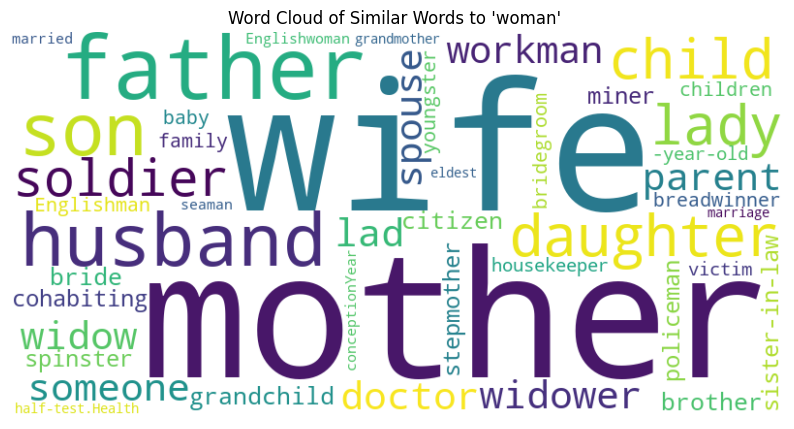

In [6]:
generate_wordcloud(model_1900_1999,'woman')

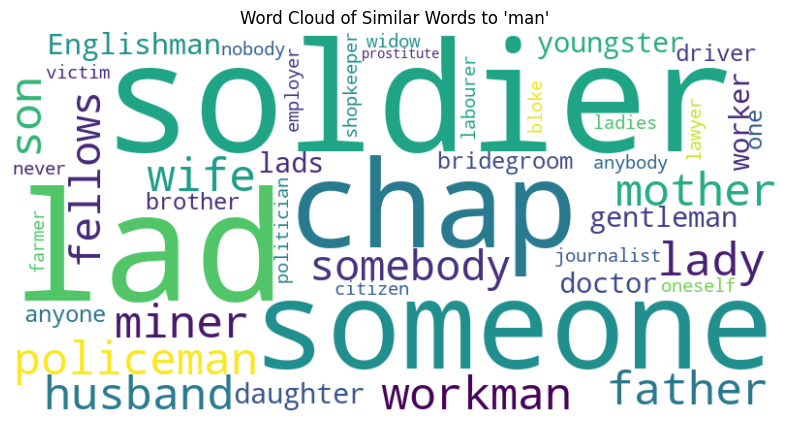

In [7]:
generate_wordcloud(model_1900_1999,'man')